In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
import torch
from pathlib import Path

##### File paths of trained models

In [6]:
path = Path("../training_outputs/d5_d_t_5_240221-134555.pt")
paths = [path]

##### Load and plot

In [9]:
training_data = torch.load(path, map_location="cpu")
training_data["training_history"].keys()

dict_keys(['epoch', 'train_loss', 'val_accuracy', 'best_val_accuracy'])

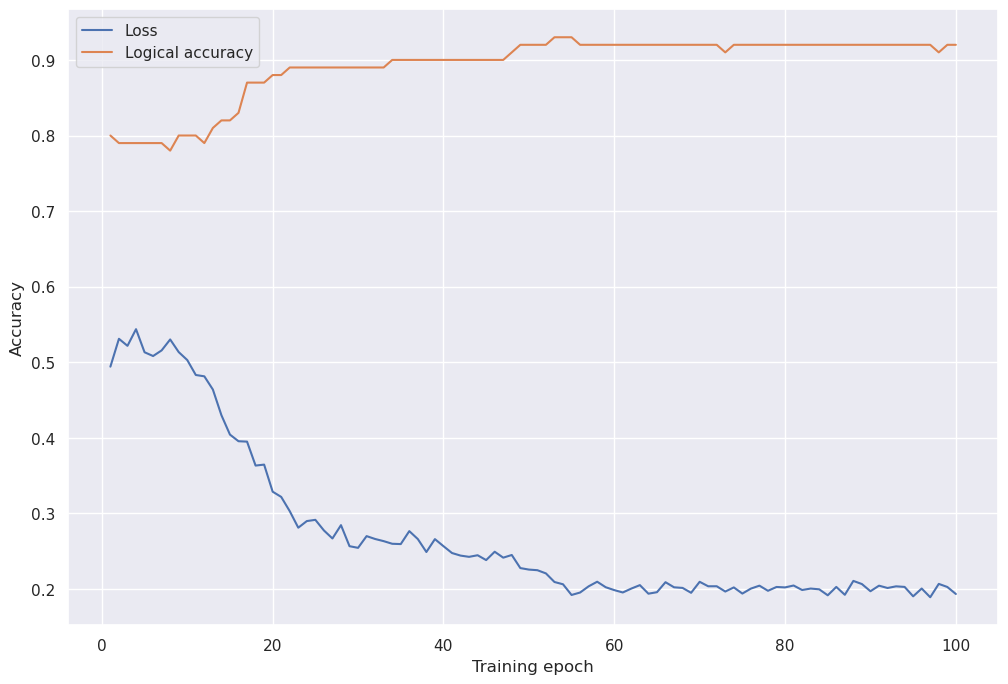

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

for i, path in enumerate(paths):

    training_data = torch.load(path, map_location="cpu")
    history = training_data["training_history"]
    train_loss = history["train_loss"]
    val_accuracy = history["val_accuracy"]
    n_epochs = history["epoch"] + 1
    
    leg_labels = ["Loss", "Logical accuracy"]
    t = range(1, n_epochs + 1)
    ax.plot(
        t,
        np.array([train_loss, val_accuracy]).T,
        label=leg_labels,
    )

    ax.set_xlabel("Training epoch")
    ax.set_ylabel("Accuracy")
    ax.legend()